# Make raster set

This module is used for making a movie with raster images at several wavelengths. It is also utilized for making the catalog file set to upload the FISS homepage.

For the live view, you should use the interactive backend of the matplolib, but you don't need to change the backend if you make a movie without showing the figure. First, we show how to draw the interactive figure.

/Users/jhkang/miniforge3/envs/fisspydocs/lib/python3.9/site-packages/fisspy/image/raster_set.py:154: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  self.fig.show()


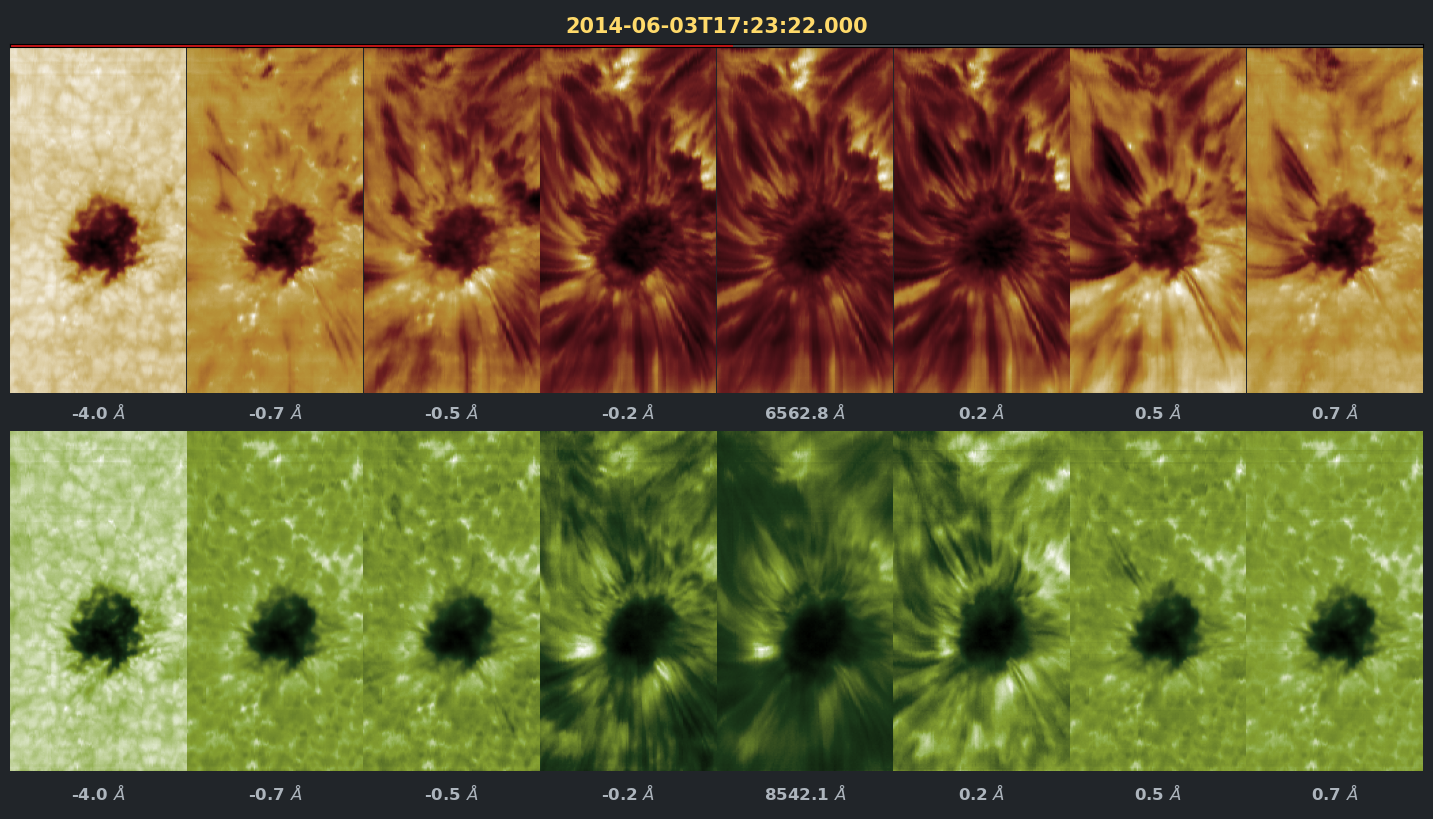

In [1]:
from fisspy.image.raster_set import makeRasterSet
from glob import glob
from os.path import join

bdir = '/Users/jhkang/Data/FISS/140603/sunspot/comp'
lfa = glob(join(bdir, "*A1_c.fts"))
lfb = glob(join(bdir, "*B1_c.fts"))
lfa.sort()
lfb.sort()

rs = makeRasterSet(lfa, lfb, show=True)

You can handle the wavelength set when you call this class, and change the frame number manually, using the '[chData](../#chData)' method.

/Users/jhkang/miniforge3/envs/fisspydocs/lib/python3.9/site-packages/fisspy/image/raster_set.py:154: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  self.fig.show()


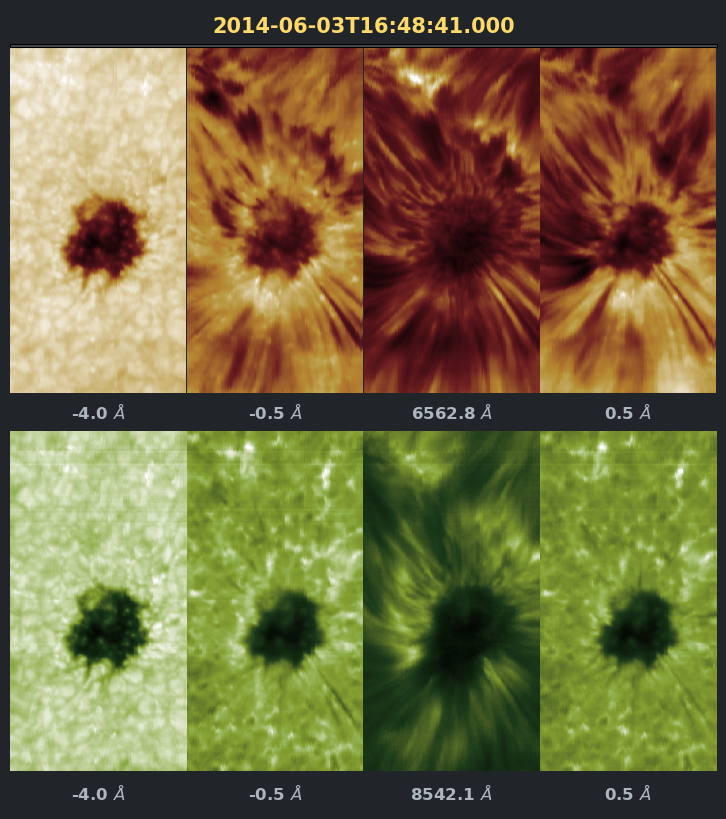

In [6]:
import numpy as np
rs = makeRasterSet(lfa, lfb, wvset=np.array([-4,-0.5,0,0.5]),show=True)
rs.chData(0)

You can save current image using the '[saveImage](../#saveImage)' and all frames using the '[saveAllImages](../#saveAllImages)'.

In [7]:
rs.saveImage(join(bdir,'test.png')) # save current frame image

In [8]:
# save all frames
from os import mkdir
from os.path import isdir

# Directory setting
imgDir = join(bdir, 'img')
if not isdir(imgDir):
    mkdir(imgDir)

# Save all frames
rs.saveAllImages(imgDir)

You can make the animation for this raster set. If you want to see this animation on the matplotlib figure, you can make the animation by calling the '[animation](../#animation)' method. But if you want to save the movie file, we highly recommend reading again with the 'show' key to False, and saving the movie with the '[saveAnimation](../#saveAnimation)' method, because it is not affected by the monitor resolution!.

In [9]:
rs.animation() # For this you can change the matplotlib backend to one of the interactive backend.

In [10]:
# save animation without showing the figure
rs = makeRasterSet(lfa, lfb, show=False)
rs.saveAnimation(imgDir)